In [2]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [6]:
# create a likelihood function for a normal distribution with known variance
def likelihood(x, mu):
    '''
    Likelihood function for a normal distribution with known variance.
    Inputs:
    x : array-like, observed data points.
    mu : float, mean parameter of the normal distribution
    Outputs:
    Log-likelihood : float, sum of log-likelihoods for each data point.
    '''
    return np.prod(norm.pdf(x, loc=mu, scale=1))

# create a log-likelihood function for a normal distribution with known variance
def log_likelihood(x, mu):
    return np.sum(norm.logpdf(x, loc=mu, scale=1))  # use logpdf for numerical stability
# create a range of mu values
mu_values = np.linspace(-5, 5, 100)

**我就開始做實驗**

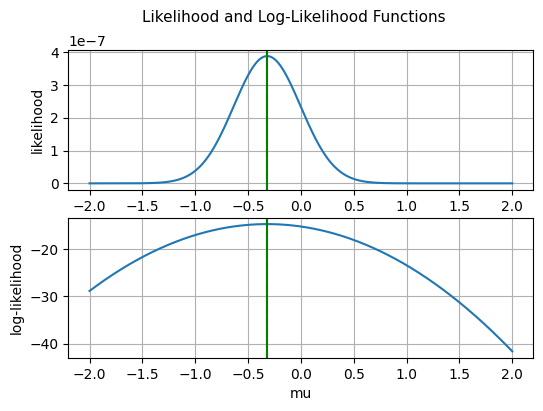

In [8]:
# generate some sample from a Gaussain distribution

# Set parameters
mu = 0      # mean
sigma = 1   # standard deviation
n = 10    # number of samples

# Generate samples
x = norm.rvs(loc=mu, scale=sigma, size=n)

mu_values = np.linspace(-2, 2, 1000)

# calculate the likelihood for each mu value
likelihood_values = [likelihood(x, mu) for mu in mu_values]
log_likelihood_values = [log_likelihood(x, mu) for mu in mu_values]

# plot the likelihood function and log-likelihood function in a 1x2 subplot

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(6, 4))

ax[0].plot(mu_values, likelihood_values)
# add super title
fig.suptitle('Likelihood and Log-Likelihood Functions', fontsize=11)

ax[0].set_xlabel('mu')
ax[0].set_ylabel('likelihood')
ax[0].grid()
# add verticle line at the maximum of the likelihood function
max_likelihood_mu = mu_values[np.argmax(likelihood_values)]
ax[0].axvline(x=max_likelihood_mu, color='r', linestyle='--')
# add verticle line at the mean of the samples
ax[0].axvline(x=np.mean(x), color='g', linestyle='-')

ax[1].plot(mu_values, log_likelihood_values)
ax[1].set_xlabel('mu')
ax[1].set_ylabel('log-likelihood')
ax[1].grid()
# add verticle line at the maximum of the log-likelihood function
max_log_likelihood_mu = mu_values[np.argmax(log_likelihood_values)]
# 這個答案就是網格方法，就是一網打盡（Mu = 1000個點）
ax[1].axvline(x=max_log_likelihood_mu, color='r', linestyle='--')
# add verticle line at the mean of the samples
ax[1].axvline(x=np.mean(x), color='g', linestyle='-')
plt.show()

**但是最大概似函數有個麻煩，就是當 n=1000 的時候，就平掉了 ...（會出事）**
**這個要在報告顯示出來**
**所以我們才會取 Log**
**取 200 時，估計值就接近 0 了（變異小），那這樣的樣本生它 1000 個，把這 1000 個平均值留起來，畫一張圖，Mu 的估計會形成什麼樣子？**

**接下來用演算法的方式求最大值！**
**概似函數把他加上負號！（因為概似函數都是在求最小值，所以我這邊 L 加上負號！**
**lambda mu 的變數就是 mu！不是 x**
**求出最小值叫做 res**

In [9]:
# compute the maximum of likeluhood(x, mu) by algorithm
from scipy.optimize import minimize_scalar

L = lambda mu: -likelihood(x, mu)  # we minimize the negative likelihood
res = minimize_scalar(L, bounds=(-2, 2), method='bounded')
max_likelihood_mu = res.x
max_likelihood = likelihood(x, max_likelihood_mu)
print(f"Maximum likelihood mu: {max_likelihood_mu}")
print(f"Maximum likelihood: {max_likelihood}")

Maximum likelihood mu: -0.31913756931173654
Maximum likelihood: 3.874904679477975e-07


**很漂亮的話就可以畫直方圖去看他們的 Mu 接近 0**

In [59]:
print(x.mean())

0.07391030469112335


**可以發現估計出來的 Mu，最大概似函數的理論值，這個跟上面的值會差一點點！**

**這三個答案會很接近！我們報告必須涵蓋這三種方式！**

**MLE 的特性：隨著樣本數的增加，估計值會往真實值去逼近！這個可以在報告中展示！**

**可以另外寫個回圈！（這個實驗我要做 1000 次，生成樣本，估計，然後存起來）**

**樣本數從 10, 20, 50, 100, 200, 500**

**做這樣的實驗！**

<hr>

**接下來有兩個變數！定義上很像，但是只是把 Sigma 放進來！**

**這邊的圖沒有畫，這個要自己畫（要畫立體圖、等高線），要早點開始做！因為會有點小麻煩～**

**圖畫對了，如果數字出來錯了，那就代表演算法有問題，不是你的函數有問題～**

In [14]:
# create a likelihood function for a normal distribution with unknown mean and variance
def likelihood_two(x, mu, sigma):
    return np.prod(norm.pdf(x, loc=mu, scale=sigma))

# create a log-likelihood function for a normal distribution with unknown mean and variance
def log_likelihood_two(x, mu, sigma):
    return np.sum(norm.logpdf(x, loc=mu, scale=sigma))  # use logpdf for numerical stability
# create a range of mu values
mu_values = np.linspace(-5, 5, 100)

這邊變數統一用 Parameters (params) 來代表
x0[0,1] 就是初始值，就是你的答案！也可以給別的！這個方法用了比較簡單的 bound，mu 的 bound 跟 Sigma 的 bound，因為 Sigma 是有限制的！他不能是負的，也不能等於 0（變數有限制時怎麼做？也是我們會探討的課題）
結果放在 res 裡面

L 是個雙變量函數，就像是下面我們有 Print L！（可以做這件事）

In [15]:
# use algorithm to compute the maximum likelihood estimates of mu and sigma
from scipy.optimize import minimize

L = lambda params: -log_likelihood_two(x, *params)  # we minimize the negative log-likelihood
res = minimize(L, x0=[0, 1], bounds=[(-2, 2), (0, 2)])
max_likelihood_mu = res.x[0]
max_likelihood_sigma = res.x[1]
# max_likelihood = res.fun
log_max_likelihood = log_likelihood_two(x, max_likelihood_mu, max_likelihood_sigma)
print(f"Maximum likelihood mu: {max_likelihood_mu}")
print(f"Maximum likelihood sigma: {max_likelihood_sigma}")
print(f"Maximum log-likelihood: {log_max_likelihood}")

Maximum likelihood mu: -8.159105531411225e-09
Maximum likelihood sigma: 1.1575908979318452
Maximum log-likelihood: -626.1118298555664


In [12]:
print(res)

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 626.1118298555664
        x: [-8.159e-09  1.158e+00]
      nit: 6
      jac: [ 1.137e-05  0.000e+00]
     nfev: 24
     njev: 8
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>


In [13]:
print(L([res.x[0], res.x[1]]), -L([0, 1]))

626.1118298555664 -635.5787549694212


接下來我們來看雙變量函數

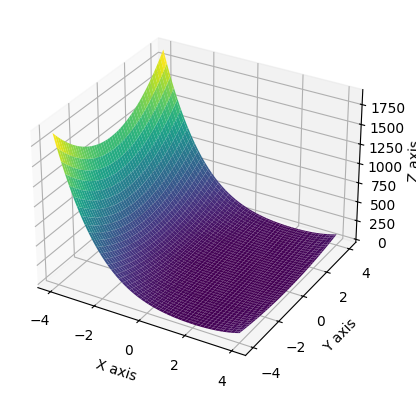

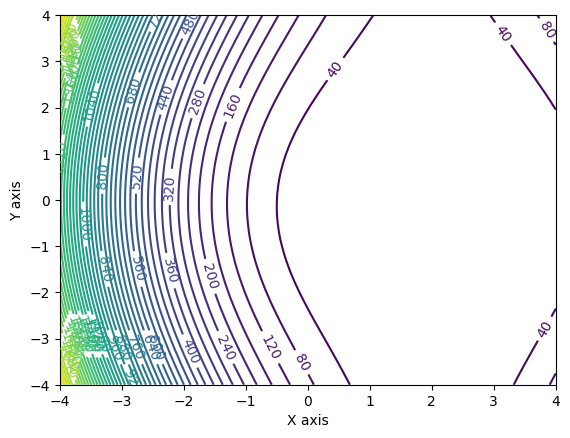

In [ ]:
# draw the wireframe for f(x, y)=(x-2)^4 + (x-2)^2*y^2 + (y+1)^2

f = lambda x : (x[0] - 2)**4 + (x[0] - 2)**2 * x[1]**2 + (x[1] + 1)**2
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X = np.linspace(-4, 4, 100)
Y = np.linspace(-4, 4, 100)
X, Y = np.meshgrid(X, Y)
Z = f([X, Y])
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, levels=50)
ax.clabel(CS, inline=1, fontsize=10)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
plt.show()

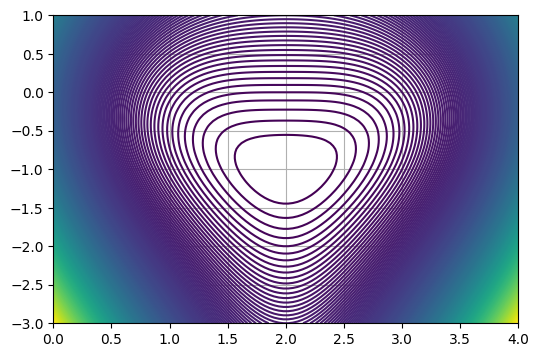

In [74]:
f = lambda x : (x[0] - 2)**4 + (x[0] - 2)**2 * x[1]**2 + (x[1] + 1)**2

x = np.linspace(0, 4, 100)
y = np.linspace(-3, 1, 100)
X, Y = np.meshgrid(x, y)
Z = f([X, Y])

fig, ax = plt.subplots(figsize=(6, 4))
contour = ax.contour(X, Y, Z, levels=300)
#add grid
ax.grid()
fig.colorbar
plt.show()

**最下面的等高線圖，最小值會落在圈圈**

**接下來來找最小值**

In [77]:
# Find the minimum of f using scripy.optimize.minimize
res = minimize(f, x0=[0, 0], bounds=[(0,0), (0,4)], method='Nelder-Mead')
print(res)

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 17.0
             x: [ 0.000e+00  0.000e+00]
           nit: 2
          nfev: 5
 final_simplex: (array([[ 0.000e+00,  0.000e+00],
                       [ 0.000e+00,  0.000e+00],
                       [ 0.000e+00,  0.000e+00]]), array([ 1.700e+01,  1.700e+01,  1.700e+01]))


nit 是演算法走了七步
從 0,0 開始走

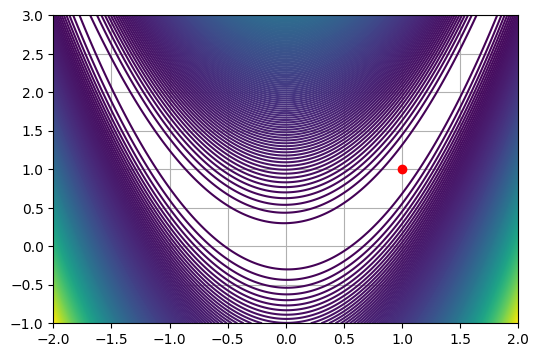

  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: 3.9899748106028614
        x: [-9.950e-01  1.000e+00]
      nit: 15
      jac: [-1.865e-06  2.005e+00]
     nfev: 54
     njev: 18
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>


In [9]:
# draw the wireframe for Rosenbrock’s banana
f = lambda x: (1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2
x = np.linspace(-2, 2, 400)
y = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x, y)
Z = f([X, Y])

fig, ax = plt.subplots(figsize=(6, 4))
contour = ax.contour(X, Y, Z, levels=300)
#add grid
ax.grid()
fig.colorbar
ax.plot(1, 1, 'ro') # minimum point
plt.show()

# Find the minimum of f using scripy.optimize.minimize
res = minimize(f, x0=[-1, 2], bounds=[(-2,2), (1,3)])
print(res)


它是個峽谷，畫立體圖就會知道～

<hr>

接下來畫概似函數圖！

In [ ]:
# create a likelihood function for a normal distribution with unknown mean and variance
def likelihood_two(x, mu, sigma):
    return np.prod(norm.pdf(x, loc=mu, scale=sigma))

# create a log-likelihood function for a normal distribution with unknown mean and variance
def log_likelihood_two(x, mu, sigma):
    return np.sum(norm.logpdf(x, loc=mu, scale=sigma))  # use logpdf for numerical stability
# create a range of mu values
mu_values = np.linspace(-5, 5, 100)

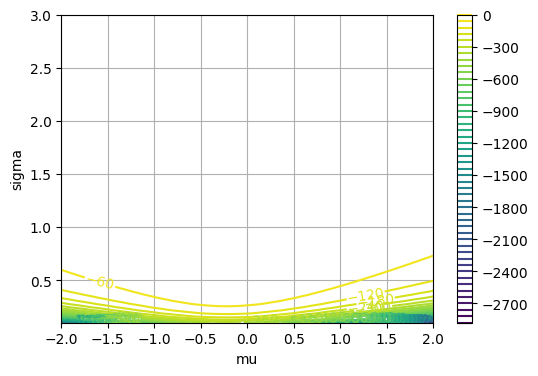

In [ ]:
# Draw the log-likelihood function as a contour plot
# generate some sample from a Gaussain distribution
# Set parameters
mu = 0      # mean
sigma = 1   # standard deviation
n = 10    # number of samples
# Generate samples
x = norm.rvs(loc=mu, scale=sigma, size=n)
mu_values = np.linspace(-2, 2, 100)
sigma_values = np.linspace(0.1, 3, 100)
MU, SIGMA = np.meshgrid(mu_values, sigma_values)
LOG_LIKELIHOOD = np.zeros(MU.shape)
for i in range(MU.shape[0]):
    for j in range(MU.shape[1]):
        LOG_LIKELIHOOD[i, j] = log_likelihood_two(x, MU[i, j], SIGMA[i, j])
fig, ax = plt.subplots(figsize=(6, 4))
contour = ax.contour(MU, SIGMA, LOG_LIKELIHOOD, levels=50)
ax.clabel(contour, inline=1, fontsize=10)
ax.set_xlabel('mu')
ax.set_ylabel('sigma')
# add grid
ax.grid()
# add color bar
fig.colorbar(contour)
plt.show()

/var/folders/wl/1mkp59496_g3_jfyl5zkfl240000gn/T/ipykernel_81536/656363926.py:10: UserWarning: The following kwargs were not used by contour: 'camp'
  plt.contour(MU, SIGMA, Z, levels=300, camp='viridis')


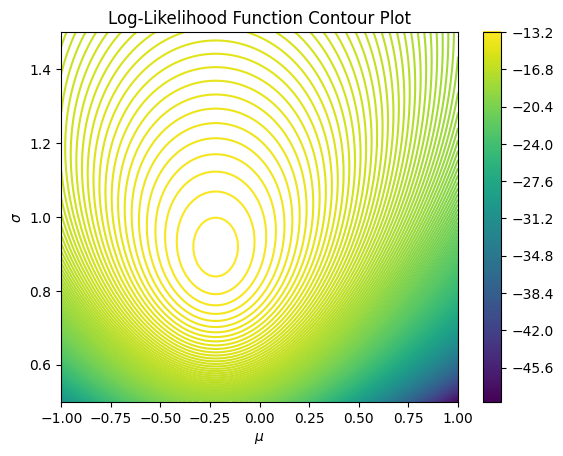

In [84]:
# Draw the log-likelihood function as a contour plot
mu_values = np.linspace(-1, 1, 100)
sigma_values = np.linspace(0.5, 1.5, 100)
MU, SIGMA = np.meshgrid(mu_values, sigma_values) # 用大寫表明它是矩陣
# Z = log_likelihood_two(x, MU, SIGMA) # Z 不能這樣做！要寫迴圈！
Z = np.zeros(MU.shape)
for i in range(len(sigma_values)):
    for j in range(len(mu_values)):
        Z[i, j] = log_likelihood_two(x, mu_values[j], sigma_values[i])
plt.contour(MU, SIGMA, Z, levels=300, camp='viridis')
plt.colorbar()
plt.xlabel('$\mu$')
plt.ylabel('$\sigma$')
plt.title('Log-Likelihood Function Contour Plot')
plt.show()
